In [1]:
import torch   # Importing the PyTorch library for building machine learning models

In [3]:
import torchvision   # Importing the torchvision library, which provides popular datasets and tools for computer visionimport torchvision   # Importing the torchvision library, which provides popular datasets and tools for computer vision

In [5]:
print("PyTorch version",torch.__version__)   # Printing the version of PyTorch being used to ensure compatibility

PyTorch version 2.2.2


In [7]:
torchvision.datasets.MNIST   # Loads the MNIST dataset of handwritten digits (0-9)

torchvision.datasets.mnist.MNIST

In [9]:
import torch   # Imports PyTorch
from torchvision import datasets, transforms   # Imports torchvision datasets and transforms for preprocessing data.
from torch.utils.data import DataLoader   # Imports DataLoader, a utility to load datasets and batch them for training.
import matplotlib.pyplot as plt   # Imports matplotlib for data visualization.

In [11]:
transform = transforms.Compose([transforms.ToTensor(),   # Converts the images to PyTorch tensors.
                                transforms.Normalize((0.5,), (0.5,))   # Normalizes the tensor values to the range [-1, 1] 
                               ])

In [13]:
import torch   # Imports PyTorch
from torchvision import datasets, transforms   # Imports torchvision datasets and transforms for preprocessing data.
from torch.utils.data import DataLoader   # Imports DataLoader, a utility to load datasets and batch them for training.
import matplotlib.pyplot as plt   # Imports matplotlib for data visualization.


In [15]:
# Load the training dataset (MNIST), apply the transformations, and download if necessary.
train_dataset = datasets.MNIST(root='./datasets', train=True, download=True, transform=transform)

In [17]:
# Create a DataLoader for the training set with a batch size of 64 and shuffling enabled.
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [19]:
# Load the test dataset (MNIST), apply the transformations, and download if necessary.
test_dataset = datasets.MNIST(root='./datasets', train=False, download=True, transform=transform)

In [21]:
# Create a DataLoader for the test set with a batch size of 64, without shuffling.
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

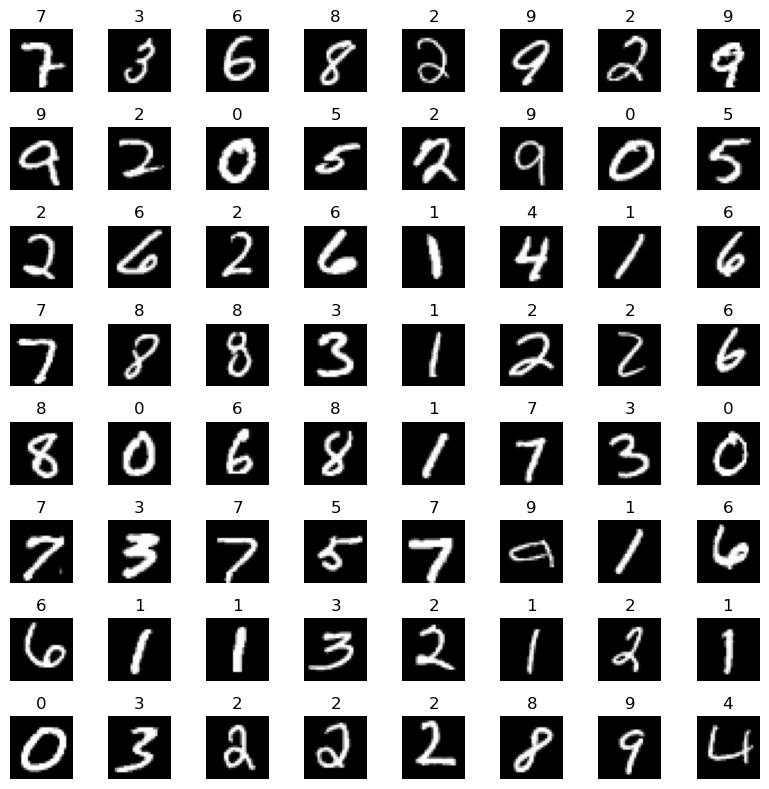

In [23]:
# Function to visualize a batch of images from the loader.
def show_batch(loader):
    data_iter = iter(loader)   # Create an iterator to go through the DataLoader.
    images, labels = next(data_iter)   # Get the next batch of images and labels.
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))    # Create an 8x8 grid of subplots to display 64 images.
    axes = axes.flatten()   # Flatten the axes to a 1D array for easier indexing.
    for i in range(64):   # Loop through the 64 images.
        image = images[i].numpy().squeeze()   # Convert the image tensor to a NumPy array and remove extra dimensions.
        axes[i].imshow(image, cmap='gray')   # Display the image in grayscale.
        axes[i].set_title(f'{labels[i].item()}')   # Set the title of each subplot to the corresponding label.
        axes[i].axis('off')   # Turn off axis ticks and labels.
    plt.tight_layout()   # Adjust the layout to prevent overlapping.
    plt.show()   # Display the grid of images.

show_batch(train_loader)   # Call the function to show a batch of training images.


In [25]:
import torch   # Imports PyTorch
from torchvision import datasets, transforms   # Imports torchvision datasets and transforms for preprocessing data.
from torch.utils.data import DataLoader   # Imports DataLoader, a utility to load datasets and batch them for training.
import matplotlib.pyplot as plt   # Imports matplotlib for data visualization.

custom_transform = transforms.Compose([
    transforms.Resize((28, 28)),   # Ensure all images are resized to 28x28 pixels  
    transforms.ToTensor(),    # Convert image to a PyTorch tensor and normalize pixel values to [0, 1]                       
    transforms.RandomRotation(10),   # Apply a random rotation to the image by up to 10 degrees 
    transforms.RandomCrop(28),   # Crop to 28x28 pixels randomly
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),   # Adjust color properties
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),   # Apply Gaussian blur
    
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),    # Apply random translation to shift images by 10% of width and height
    transforms.Pad(2),    # Add padding of 2 pixels to increase image size to 34x34                          
    
    transforms.Normalize((0.5,), (0.5,)),])    # Normalize tensor values to the range [-1, 1]

In [27]:
# Load the MNIST dataset for training and testing
train_dataset = datasets.MNIST(root='./datasets', train=True, download=True, transform=custom_transform)
test_dataset = datasets.MNIST(root='./datasets', train=False, download=True, transform=custom_transform)

In [29]:
# Create DataLoader objects for batching and shuffling the data during training/testing
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Type of images: <class 'torch.Tensor'>, Type of labels: <class 'torch.Tensor'>
Shape of images: torch.Size([64, 1, 32, 32])


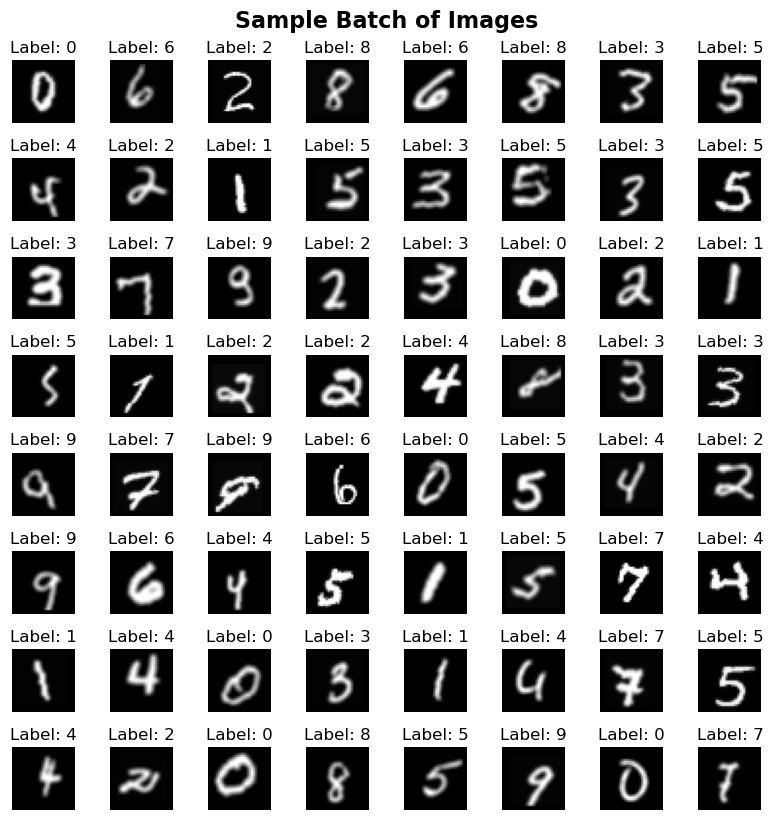

In [31]:
def show_batch(loader, num_images=64):
    data_iter = iter(loader)  # Create an iterator from the data loader
    images, labels = next(data_iter)  # Get a batch of images and labels

    # Debugging output to check the type of images and labels
    print(f'Type of images: {type(images)}, Type of labels: {type(labels)}')
    print(f'Shape of images: {images.shape if isinstance(images, torch.Tensor) else "Not a tensor"}')

    num_cols = 8  # Determine the number of columns for the subplot grid
    num_rows = num_images // num_cols if num_images % num_cols == 0 else (num_images // num_cols) + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))  # Set up the figure for displaying images
    axes = axes.flatten()

    for i in range(num_images):  # Loop through the number of images to display
        image = images[i].numpy().squeeze()  # Convert image tensor to numpy array
        axes[i].imshow(image, cmap='gray')  # Display the image in grayscale
        axes[i].set_title(f'Label: {labels[i].item()}')  # Show the corresponding label
        axes[i].axis('off')  # Hide the axes

    for j in range(num_images, len(axes)):  # Hide any remaining empty subplots
        axes[j].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.suptitle('Sample Batch of Images', fontsize=16, fontweight='bold', y=1.02)  # Title for the entire plot
    plt.show()  # Show the figure

# Show a batch of images from the train_loader
show_batch(train_loader)


In [33]:
images, labels = next(iter(train_loader))
print(f'Images type: {type(images)}')  # Should be <class 'torch.Tensor'>
print(f'Labels type: {type(labels)}')  # Should be <class 'torch.Tensor'>


Images type: <class 'torch.Tensor'>
Labels type: <class 'torch.Tensor'>


# Baseline Model with Multilayer Perceptrons

## Implement a baseline model using a simple Multilayer Perceptron (MLP)

In [122]:
import torch  # Importing PyTorch library
import torch.nn as nn  # Importing neural network module from PyTorch
import torch.optim as optim  # Importing optimization algorithms
from torch.utils.data import DataLoader  # Importing DataLoader for handling datasets
from torchvision import datasets, transforms  # Importing datasets and transformations from torchvision
from sklearn.metrics import precision_score, recall_score, f1_score  # Importing evaluation metrics

# Define an MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()  # Initialize the parent class
        self.fc1 = nn.Linear(28*28, 256)  # Input layer to first hidden layer with 256 neurons
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization after the first hidden layer
        self.fc2 = nn.Linear(256, 128)  # First hidden layer to second hidden layer with 128 neurons
        self.bn2 = nn.BatchNorm1d(128)  # Batch normalization after the second hidden layer
        self.fc3 = nn.Linear(128, 64)  # Second hidden layer to third hidden layer with 64 neurons
        self.bn3 = nn.BatchNorm1d(64)  # Batch normalization after the third hidden layer
        self.fc4 = nn.Linear(64, 10)  # Third hidden layer to output layer (10 classes for digits 0-9)
        self.dropout = nn.Dropout(0.3)  # Dropout layer to reduce overfitting

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image to a 1D vector
        x = torch.relu(self.bn1(self.fc1(x)))  # First hidden layer with ReLU and batch normalization
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.bn2(self.fc2(x)))  # Second hidden layer with ReLU and batch normalization
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.bn3(self.fc3(x)))  # Third hidden layer with ReLU and batch normalization
        x = self.fc4(x)  # Output layer
        return x  # Return the output logits

# Load the MNIST dataset with normalization transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./datasets', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./datasets', train=False, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = MLP()  # Instantiate the MLP model
loss_fn = nn.CrossEntropyLoss()  # Define the loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer with learning rate

# Training function
def train_model(model, train_loader, loss_fn, optimizer, epochs=10):
    for epoch in range(epochs):  # Loop over epochs
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:  # Loop over batches
            # Forward pass
            outputs = model(images)  # Model predictions
            loss = loss_fn(outputs, labels)  # Loss calculation

            # Backward pass and optimization
            optimizer.zero_grad()  # Reset gradients
            loss.backward()  # Backpropagate
            optimizer.step()  # Update parameters

            # Compute accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%')

# Testing and Evaluation function with additional metrics
def test_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient calculation for testing
        for images, labels in test_loader:
            outputs = model(images)  # Model predictions
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.tolist())
            all_predictions.extend(predicted.tolist())

    # Accuracy, precision, recall, F1 score
    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    print(f'Test Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

# Train and evaluate the model
train_model(model, train_loader, loss_fn, optimizer, epochs=10)  # Training
test_model(model, test_loader)  # Testing and evaluation


Epoch 1, Loss: 0.3410, Accuracy: 90.78%
Epoch 2, Loss: 0.1625, Accuracy: 95.08%
Epoch 3, Loss: 0.1333, Accuracy: 95.86%
Epoch 4, Loss: 0.1140, Accuracy: 96.50%
Epoch 5, Loss: 0.1013, Accuracy: 96.85%
Epoch 6, Loss: 0.0924, Accuracy: 97.06%
Epoch 7, Loss: 0.0832, Accuracy: 97.33%
Epoch 8, Loss: 0.0811, Accuracy: 97.43%
Epoch 9, Loss: 0.0716, Accuracy: 97.69%
Epoch 10, Loss: 0.0692, Accuracy: 97.83%
Test Accuracy: 98.36%
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
